In [10]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [98]:
pip install pandoc

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33286 sha256=1d82bb4d884e565ccc90aeeecc7f6faf5b8daa69c31538804e781487b78b5031
  Stored in directory: /Users/lindsey/Library/Caches/pip/wheels/76/27/c2/c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
cd Downloads

/Users/lindsey/Downloads


In [7]:
df = pd.read_excel("Self-Care Raw Data Randomized.xlsx")

In [9]:
df.head(1)

,url,date,Title,contents,Domain,Sentiment,Emotion,Country,Author
0,https://www.reddit.com/r/lgbt/comments/1000wfz...,2023-01-01 01:49:25,new year old me (comic) HEAVY TW,Hey sometimes the best we can do in a day is b...,reddit.com,positive,Joy,NaN,discoleopard


In [10]:
data = df.groupby(["date","contents"]).size()

In [16]:
df.date.value_counts()

2023-01-01 01:49:25    1
2022-11-07 15:17:21    1
2022-11-06 01:38:27    1
2022-11-06 05:57:03    1
2022-11-06 13:05:58    1
                      ..
2022-12-04 22:22:16    1
2022-12-04 22:42:27    1
2022-12-05 13:33:54    1
2022-12-05 14:09:06    1
2022-10-06 07:37:11    1
Name: date, Length: 400, dtype: int64

In [13]:
# datas = df['date'].value_counts().sort_index()

In [17]:
import datetime as dt

In [11]:
import matplotlib.pyplot as plt

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['Day_of_week'] = df['date'].apply(lambda x: x.weekday())

In [13]:
df.Day_of_week.value_counts()

3    70
0    62
5    61
1    56
6    55
4    52
2    44
Name: Day_of_week, dtype: int64

In [14]:
df["Day_Name"] = df['date'].dt.day_name()

In [57]:
df["Time_of_Day"] = df['date'].dt.hour

In [35]:
df["Time_of_Day_Str"] = df["Time_of_Day"].astype('str')

In [39]:
df = df.replace({'Time_of_Day_Str' : {'0':'12am', '1':'1am', '2':'2am', '3':'3am', '4':'4am', '5':'5am',
                                     '6':'6am', '7':'7am', '8':'8am', '9':'9am', '10':'10am', '11':'11am',
                                     '12':'12pm', '13':'1pm', '14':'2pm', '15':'3pm', '16':'4pm', '17':'5pm',
                                     '18':'6pm', '19':'7pm', '20':'8pm', '21':'9pm', '22':'10pm', '23':'11pm'}})

In [29]:
df = df.sort_values('Day_Name')

In [40]:
df["Time_of_Day_Str"].value_counts()

1pm     25
4pm     24
3pm     24
11am    24
5pm     22
1am     21
12pm    21
4am     21
9pm     21
6pm     19
2pm     18
2am     17
10pm    17
3am     14
9am     14
8am     13
5am     13
10am    12
7pm     11
6am     11
11pm    11
8pm     10
12am    10
7am      7
Name: Time_of_Day_Str, dtype: int64

In [20]:
df['Day_Name'] = pd.Categorical(df['Day_Name'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday',
                                                           'Saturday','Sunday'], ordered=True)

In [21]:
df['Day_Name']

0        Sunday
1        Sunday
2      Saturday
3      Saturday
4      Saturday
         ...   
395      Friday
396    Thursday
397    Thursday
398    Thursday
399    Thursday
Name: Day_Name, Length: 400, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [29]:
df['Time_of_Day'] = pd.Categorical(df['Time_of_Day'], categories=['12am','1am','2am','3am','4am','5am','6am','7am',
                                                                 '8am', '9am', '10am','11am','12pm','1pm','2pm',
                                                                 '3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm',
                                                                 '11pm'], ordered=True)

In [28]:
df['Time_of_Day'] = df['Time_of_Day'].astype('str')

In [30]:
df['Time_of_Day']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
395    NaN
396    NaN
397    NaN
398    NaN
399    NaN
Name: Time_of_Day, Length: 400, dtype: category
Categories (24, object): ['12am' < '1am' < '2am' < '3am' ... '8pm' < '9pm' < '10pm' < '11pm']

In [40]:
df['Day_Name'].sort_index().value_counts()

Thursday     70
Monday       62
Saturday     61
Tuesday      56
Sunday       55
Friday       52
Wednesday    44
Name: Day_Name, dtype: int64

In [71]:
df.columns

Index(['url', 'date', 'Title', 'contents', 'Domain', 'Sentiment', 'Emotion',
       'Country', 'Author', 'Day_of_week', 'Day_Name'],
      dtype='object')

Joy        262
Sadness     35
Anger       24
Fear        12
Disgust      7
Name: Emotion, dtype: int64

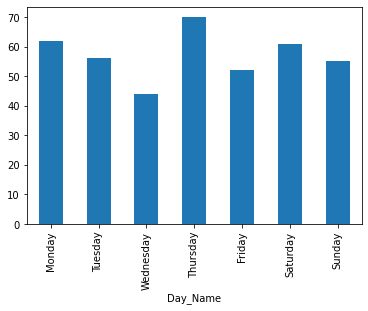

In [41]:
# plot occurences of contents column by aggregate day of the week within 
m = df.groupby(df.Day_Name,sort=False)['contents'].count().plot(kind="bar")
plt.show()

In [42]:
dfDate = df.copy()

In [43]:
dfDate = dfDate[(dfDate['date'] > "2022-10-06") & (dfDate['date'] < "2023-01-01")]

In [44]:
dfDate.Day_Name.value_counts(), df.Day_Name.value_counts()

(Thursday     70
 Monday       62
 Saturday     61
 Tuesday      56
 Sunday       53
 Friday       52
 Wednesday    44
 Name: Day_Name, dtype: int64,
 Thursday     70
 Monday       62
 Saturday     61
 Tuesday      56
 Sunday       55
 Friday       52
 Wednesday    44
 Name: Day_Name, dtype: int64)

In [45]:
dfDate['Formatted_Date'] = pd.to_datetime(dfDate['date'], format='%Y-%m-%d')

In [46]:
filtered_df = dfDate.loc[(dfDate['date'] >= '2022-10-05')
                     & (dfDate['date'] < '2023-01-02')]

In [47]:
filtered_df.shape

(398, 14)

In [48]:
dfDate = dfDate[(dfDate['Emotion'] == 'Joy')]

In [49]:
dfDate.shape

(262, 14)

### Plot by Day of the Week

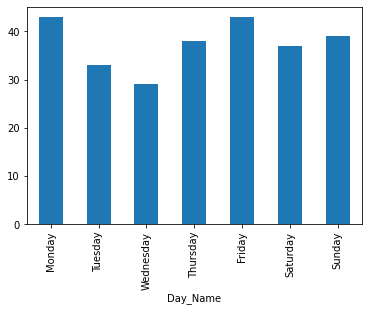

In [50]:
# plot occurences of contents column by aggregate day of the week within - for Emotion "Joy"
m = dfDate.groupby(dfDate.Day_Name,sort=False)['contents'].count().plot(kind="bar")
plt.show()

### Plot by Time of Day

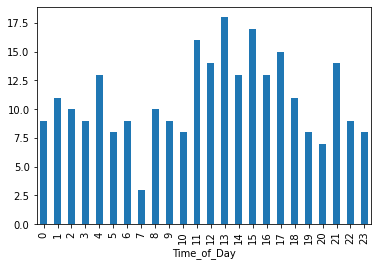

In [60]:
# plot occurences of contents column by aggregate day of the week within - for Emotion "Joy"
m = dfDate.groupby(dfDate.Time_of_Day,sort=True)['contents'].count().plot(kind="bar")
plt.show()


In [65]:
# x = ['12am','1am','2am','3am','4am','5am','6am','7am','8am', '9am', '10am','11am','12pm','1pm','2pm',
#      '3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']

# plt.set_xticklabels(x)

### Word Cloud Creation

In [97]:
# pip install wordcloud

In [68]:
from wordcloud import WordCloud

In [70]:
df.contents.isna().sum()

0

In [73]:
comments = " ".join(df.contents.tolist())
comments

'Hey sometimes the best we can do in a day is brush our teeth. Just one self care thing a day, no matter how small, is everything. Your art is amazing! Happy new year RT @mxxnquakes happy new year! wish your 2023 is full of happiness, smiles and positive energy, remember to love yourself the most and let self-love grows, cheers 🖤 RT @_Pammy_DS_ avoiding people who repeatedly trigger your mental health and lower your vibe is top tier self-care. I finished my first quilt!!! The sense of accomplishment and self love i have for myself is at an all time high lol so many mistakes but theyre all adorable and fine, its my blanket, no worries! https://t.co/47l78HxYtd RT @niicole__nicole my main two goals for next year is money management & SELF CARE heavy on that 😭 I’M SORRY BROTHER BECAUSE I UPVOTED AND RUINED YOUR SWEET 420 BUT I HAD TO BECAUSE GIVING IMAGE TRANSCRIPTIONS IS SUCH A BADASS WAY TO HELP OUR SIGHT IMPAIRED BROTHERS AND SISTERS TO BE INCLUDED AND CRANK THEIR HOGS WITH THE REST OF 

In [95]:
## If you'd like a different word cloud, just Shift+Enter this cell an the following cell to populate a new one
word_cloud = WordCloud(collocations = False, background_color = 'white', width=800,height=650).generate(comments)

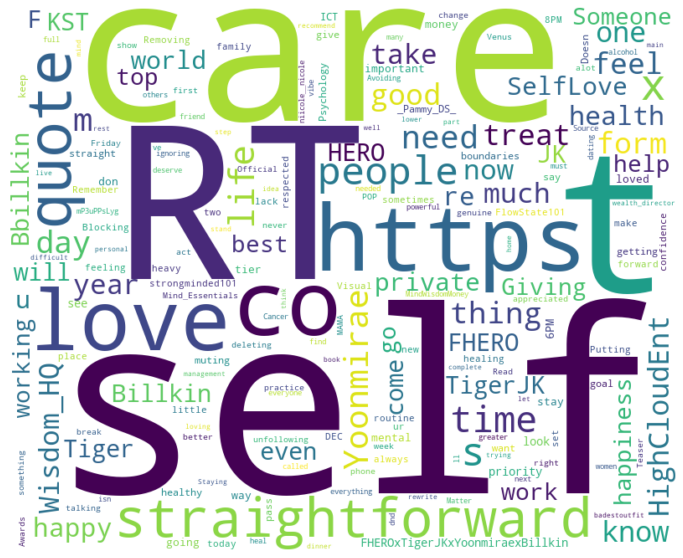

In [96]:
# cloud = WordCloud(width=200/my_dpi,height=150/my_dpi)
# plt.imshow(cloud.generate_from_frequencies(t))
# plt.savefig('c.png', dpi=my_dpi)
# plt.clf()

plt.figure( figsize=(20,10) )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()